# Linear Regression Assignment
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Read and understand the data

In [5]:
df_bike = pd.read_csv("day.csv")
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df_bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [7]:
df_bike.shape

(730, 16)

In [8]:
df_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Obervation
Data type of dteday variable needs to be changed

In [10]:
df_bike["dteday"] = pd.to_datetime(df_bike["dteday"], format='mixed', dayfirst = True)
df_bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [11]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Observation
No missing values

In [13]:
df_bike[["temp","atemp","hum","windspeed","casual","registered","cnt"]].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Null Value check

In [15]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observation
No null values

## Step 2: Data Visualization

In [18]:
cat = df_bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt']].copy()
cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,6,0,2,985
1,1,0,1,0,0,0,2,801
2,1,0,1,0,1,1,1,1349
3,1,0,1,0,2,1,1,1562
4,1,0,1,0,3,1,1,1600


In [19]:
cat['season']  = cat['season'].apply(lambda x: "spring" if x==1 else("summer" if x==2 else("fall" if x==3 else "winter")))
cat['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [20]:
# Defining the map function
def month_map(x):
    y = ""
    if x==1:
        y = 'Jan'
    elif x==2:
        y = 'Feb'
    elif x==3:
        y = 'Mar'
    elif x==4:
        y = 'Apr'
    elif x==5:
        y = 'May'
    elif x==6:
        y = 'Jun'
    elif x==7:
        y = 'Jul'
    elif x==8:
        y = 'Aug'
    elif x==9:
        y = 'Sep'
    elif x==10:
        y = 'Oct'
    elif x==11:
        y = 'Nov'
    elif x==12:
        y = 'Dec'
    return y

# Applying the function to the month list
cat['mnth'] = cat['mnth'].apply(month_map)
cat['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [21]:
cat['weathersit']  = cat['weathersit'].apply(lambda x: "clear" if x==1 else("mist" if x==2 else("light" if x==3 else "heavy")))
cat['weathersit'].value_counts()

weathersit
clear    463
mist     246
light     21
Name: count, dtype: int64

In [22]:
cat['yr']  = cat['yr'].apply(lambda x: "2019" if x==1 else "2018")
cat['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [23]:
cat['holiday']  = cat['holiday'].apply(lambda x: "yes" if x==1 else "no")
cat['holiday'].value_counts()

holiday
no     709
yes     21
Name: count, dtype: int64

In [24]:
cat['workingday']  = cat['workingday'].apply(lambda x: "yes" if x==1 else "no")
cat['workingday'].value_counts()

workingday
yes    499
no     231
Name: count, dtype: int64

Text(0.5, 0.98, 'Univariate Analysis of Categorical Variables')

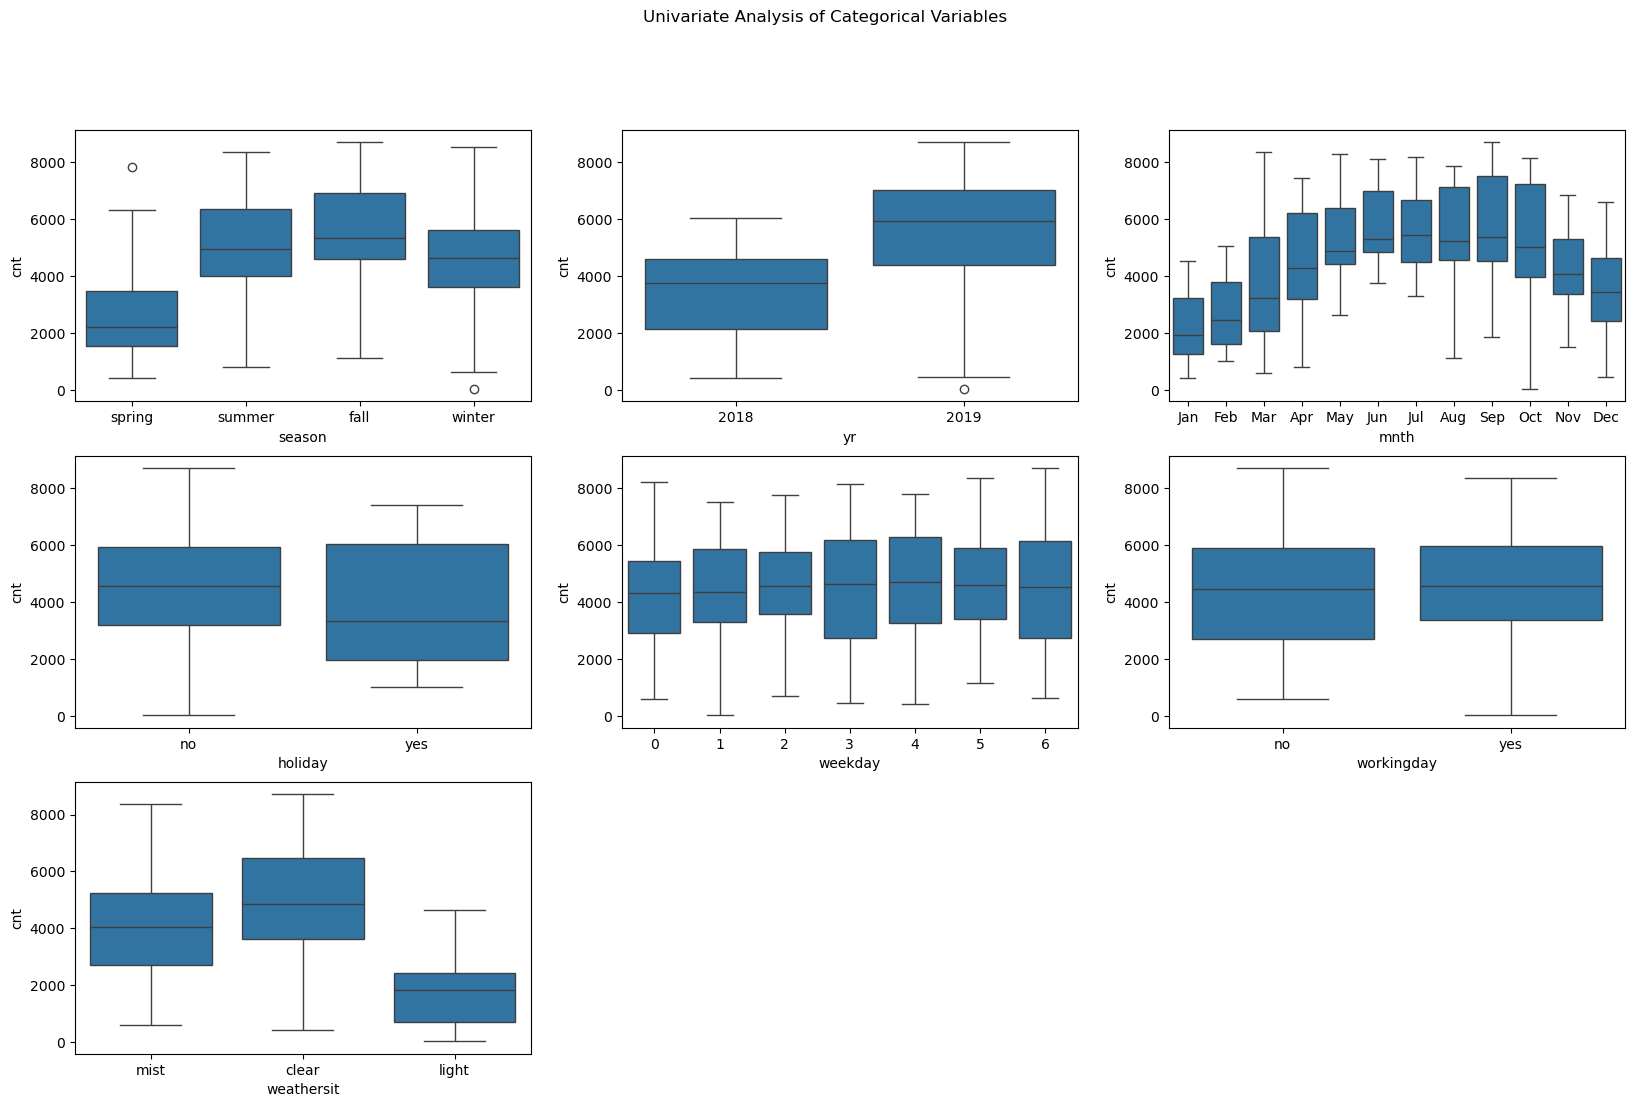

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season' , y = "cnt" , data = cat)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr' , y = "cnt" , data = cat)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth' , y = "cnt" , data = cat)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday' , y = "cnt" , data = cat)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday' , y = "cnt" , data = cat)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday' , y = "cnt" , data = cat)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit' , y = "cnt" , data = cat)

plt.suptitle("Univariate Analysis of Categorical Variables")

#### Observations:
- Season has an impact on the demand. Demand is observed to be the highest in the fall closely followed by summer. Demand is observed to be significantly reduced in the Spring.
- Monthwise demand data shows the similar trend as of seasnal data which is not surprising.
- There is a significant increase in the average demand in the year of 2019 compared to 2018 indicating solid year on year growth of the company.
- Weather on the given day seems to have an impact on the demand for that day. On a clear day the demand seems to be higher than the day with any other weather condition. Demand seems to be significantly dropped on the day with a poor weather.
- Average demand seems to be dropped on the holiday.
- Average demand does not seem to be affected whether it is a working day or not.
- Average demand seems to be same on any given day of the week. 

## Explratory Data analysis

<Axes: xlabel='dteday'>

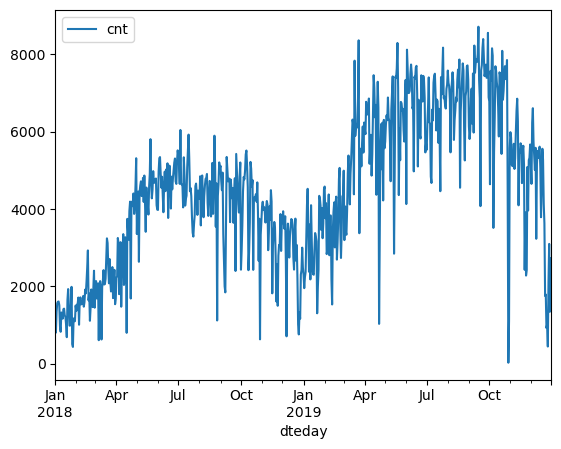

In [28]:
df_bike.plot.line(x='dteday',y='cnt')

<Axes: xlabel='weekday', ylabel='cnt'>

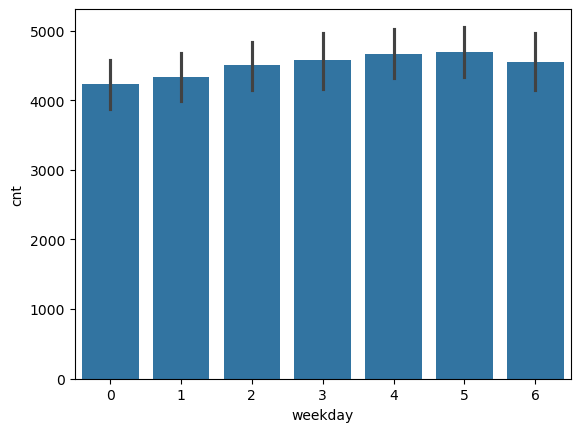

In [29]:
sns.barplot(data=df_bike,x='weekday',y='cnt')

<Axes: xlabel='season', ylabel='cnt'>

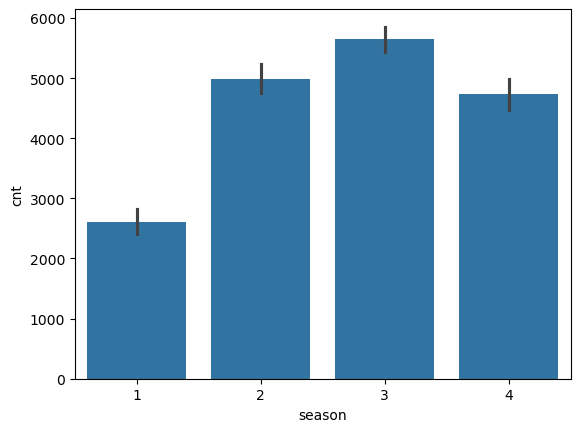

In [30]:
sns.barplot(data=df_bike,x='season',y='cnt')

<Axes: xlabel='yr', ylabel='cnt'>

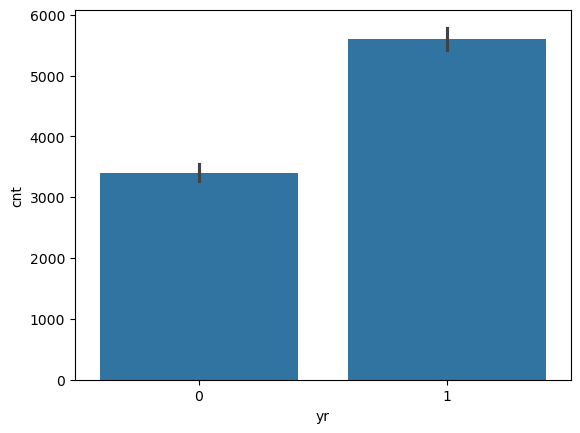

In [31]:
sns.barplot(data=df_bike,x='yr',y='cnt')

<Axes: xlabel='mnth', ylabel='cnt'>

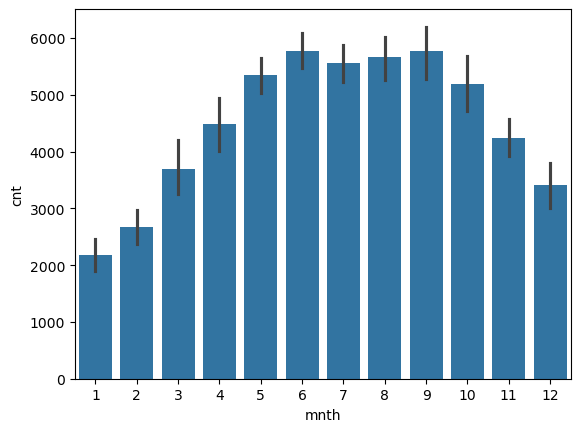

In [32]:
sns.barplot(data=df_bike,x='mnth',y='cnt')

<Axes: xlabel='holiday', ylabel='cnt'>

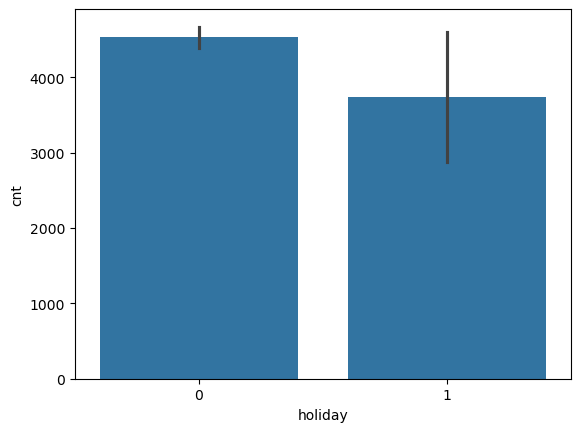

In [33]:
sns.barplot(data=df_bike,x='holiday',y='cnt')

<Axes: xlabel='workingday', ylabel='cnt'>

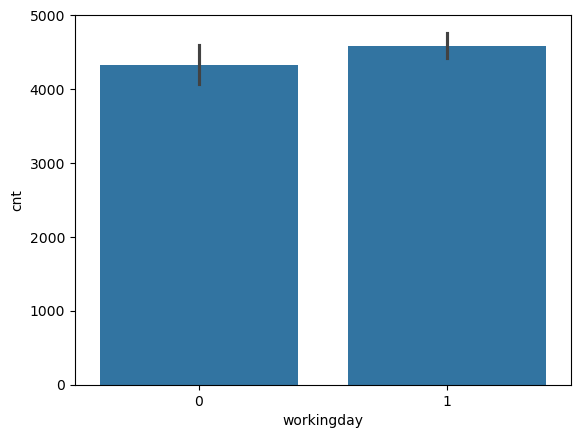

In [34]:
sns.barplot(data=df_bike,x='workingday',y='cnt')

<Axes: xlabel='weathersit', ylabel='cnt'>

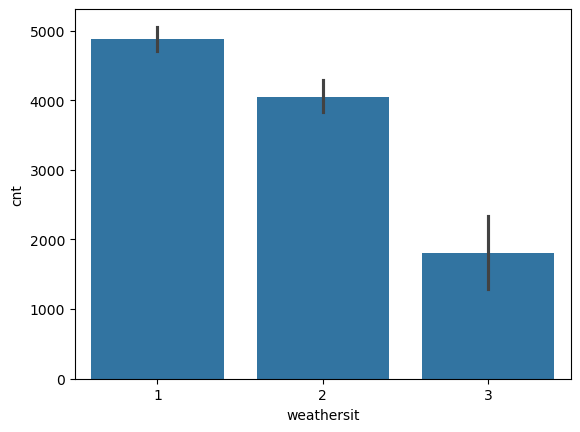

In [35]:
sns.barplot(data=df_bike,x='weathersit',y='cnt')

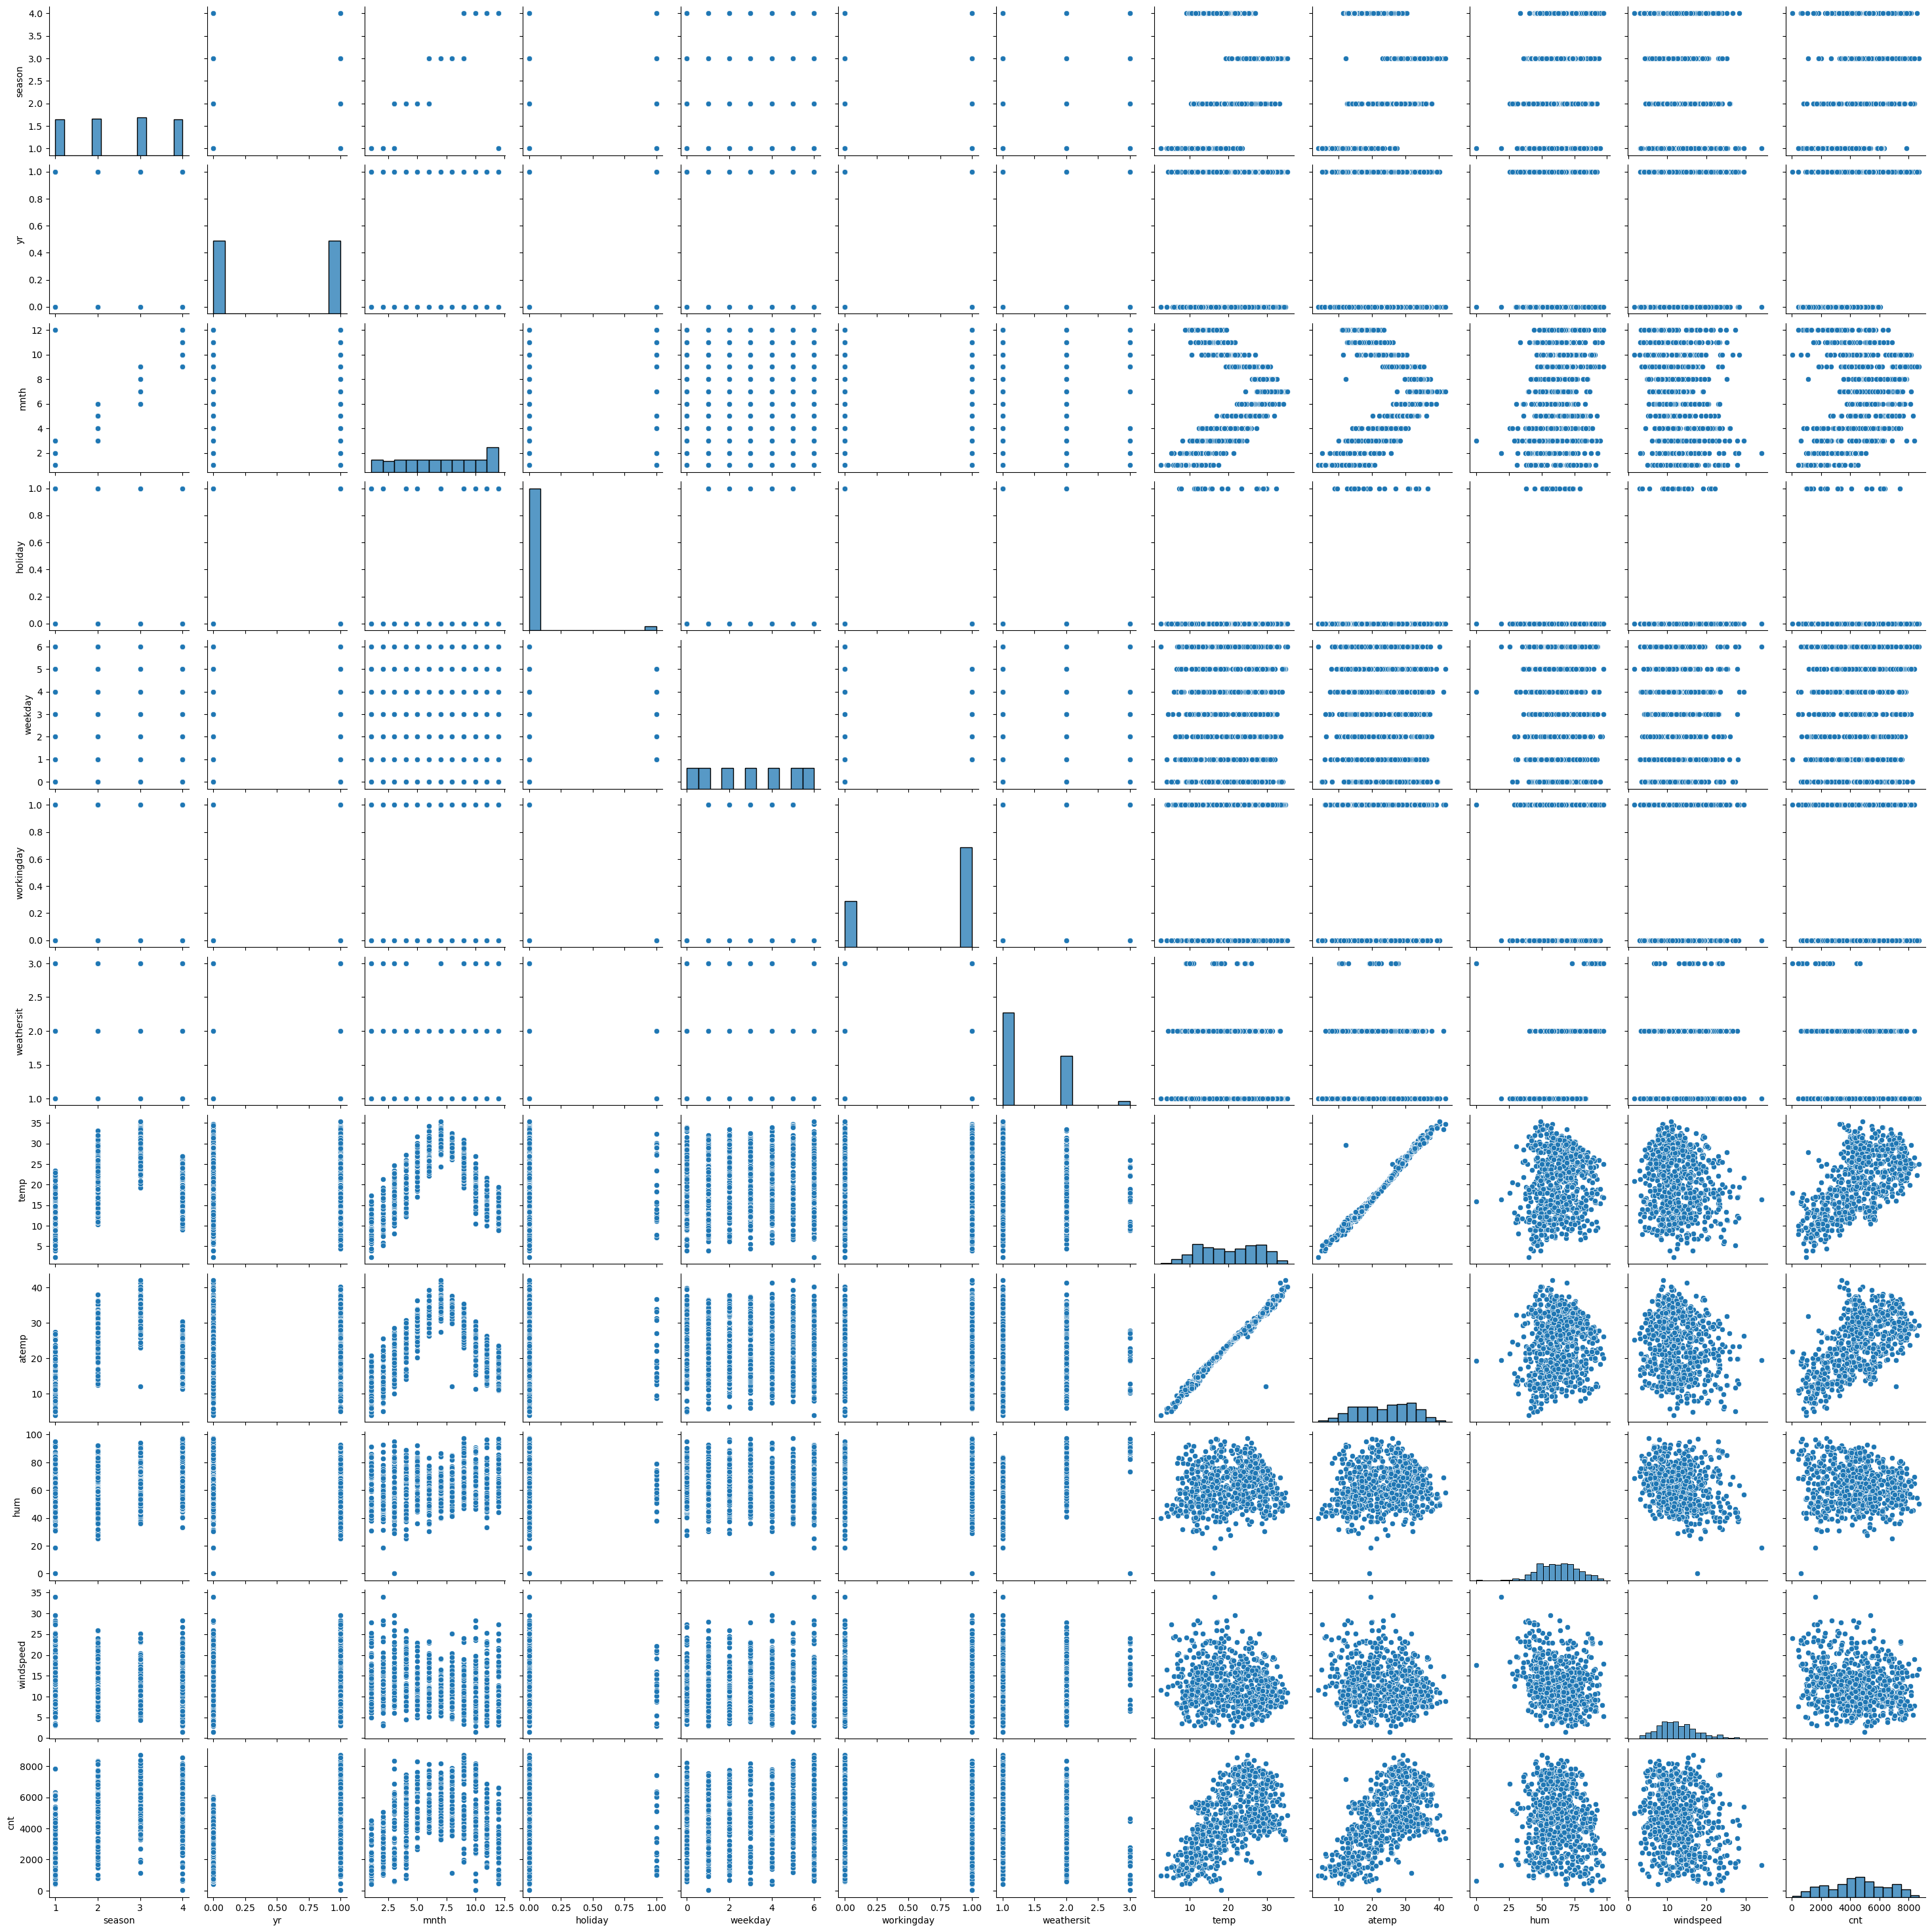

In [36]:
bike_param = df_bike.drop(["instant","dteday","casual","registered"],axis='columns')
sns.pairplot(bike_param)
plt.show()

### Temperature releated Data shows faily linear relation with dependant variable

In [38]:
bike_param.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


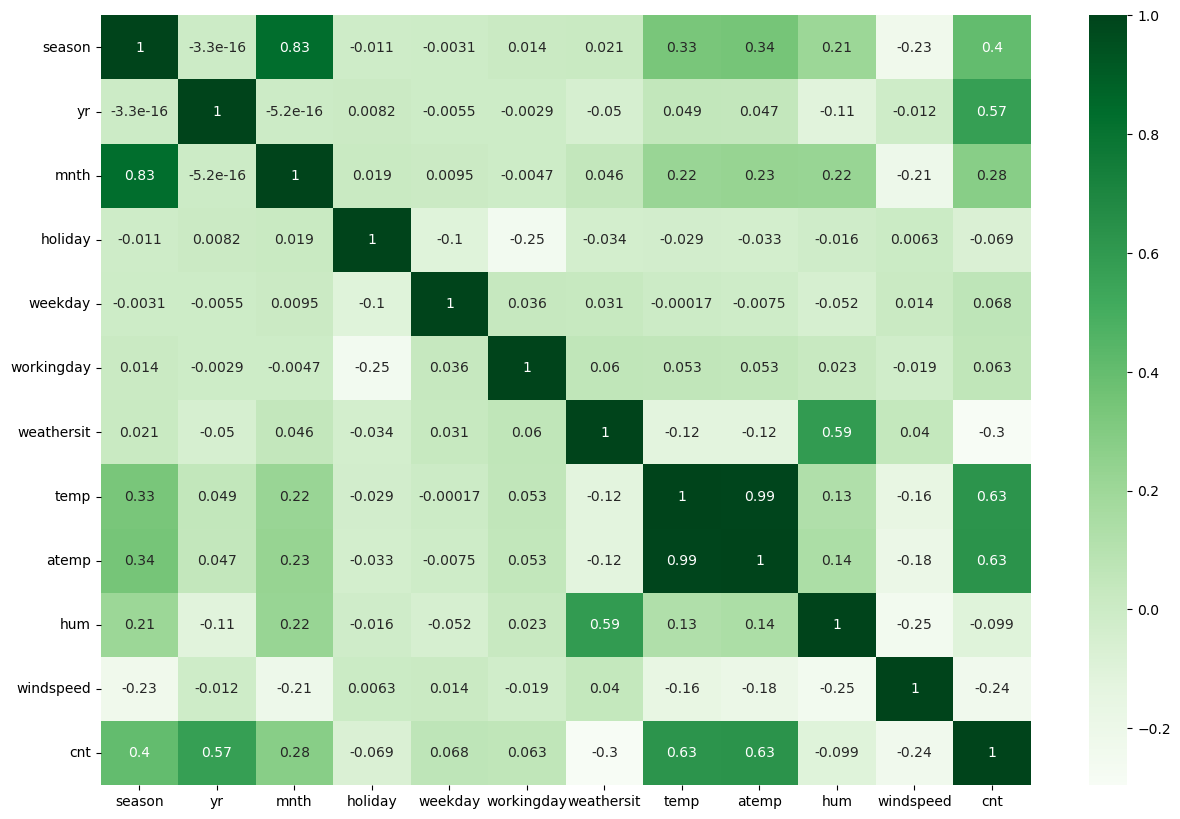

In [39]:
plt.figure(figsize=(15, 10))  # Set the figure size
sns.heatmap(bike_param.corr(), cmap="Greens", annot = True)
plt.show()

## Step 3: Data Preparation

In [41]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(cat['season'],dtype=int)

In [42]:
dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We don't need four columns. We can work with three columns.
- 000 -> fall
- 100 -> spring
- 010 -> summer
- 001 -> winter

In [44]:
# Dropping first column from dummy
dummy = pd.get_dummies(cat['season'],dtype=int, drop_first = True)

In [45]:
# Add dummy variables to df_bike dataframe
bike_param = pd.concat([bike_param , dummy], axis = 1)

In [46]:
bike_param.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [47]:
#drop season as we have created dummies for it
bike_param.drop(['season'],axis=1, inplace=True)

In [48]:
bike_param.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [49]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(cat['weathersit'],dtype=int)

In [50]:
dummy.head()

,clear,light,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


We don't need three columns. We can work with three columns.
- 00 -> clear
- 10 -> light
- 01 -> mist

In [52]:
# Dropping first column from dummy
dummy = pd.get_dummies(cat['weathersit'],dtype=int, drop_first = True)

In [53]:
# Add dummy variables to df_bike dataframe
bike_param = pd.concat([bike_param , dummy], axis = 1)

In [54]:
bike_param.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light,mist
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [55]:
#drop weathersit as we have created dummies for it
bike_param.drop(['weathersit'],axis=1, inplace=True)

In [56]:
bike_param.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light,mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [57]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(cat['mnth'],dtype=int)

In [58]:
dummy.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [59]:
# Dropping first column from dummy
dummy = pd.get_dummies(cat['mnth'],dtype=int, drop_first = True)

In [60]:
# Add dummy variables to df_bike dataframe
bike_param = pd.concat([bike_param , dummy], axis = 1)

In [61]:
#drop mnth as we have created dummies for it
bike_param.drop(['mnth'],axis=1, inplace=True)

In [62]:
bike_param.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [63]:
bike_param.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,...,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.500343,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,...,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Sgep 4: Splitting the data into Training and Test set

In [65]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_param, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features
Using Min-Max scaling on variables except yr, holiday, workinday and dummy variables

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
# Apply scaler() to all the columns except the yr, holiday, workinday and dummy variables
num_vars = ['weekday', 'temp', 'atemp', 'hum','windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [70]:
df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df_train.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


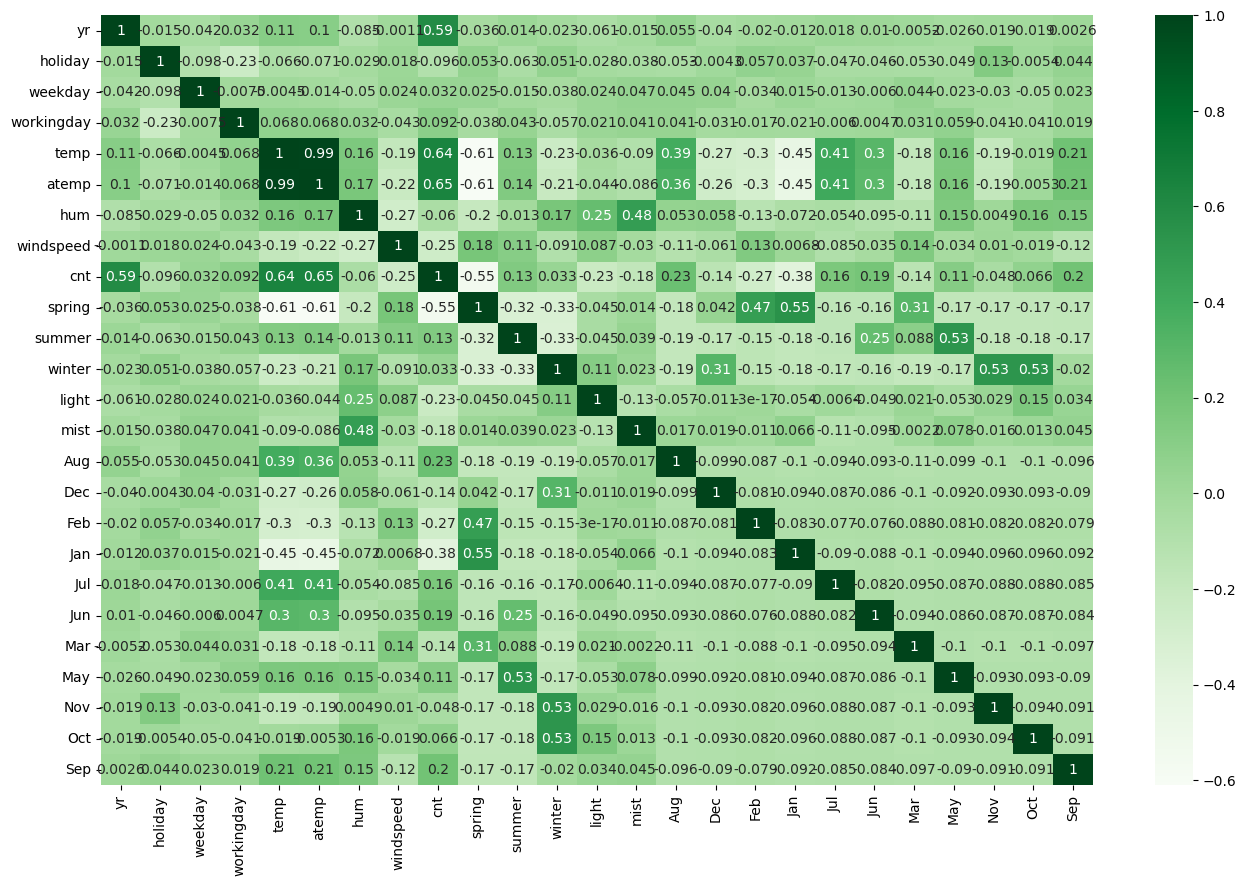

In [72]:
# Checking correlation

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

Temperature seems to be correleted the most the demand followed by the year

### Dividing into X and Y sets for the model building

In [75]:
y_train = df_train.pop('cnt')
X_train = df_train

In [76]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [77]:
X_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Building a model

Using RFE and manual method to build he model

In [80]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [82]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 7),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('light', True, 1),
 ('mist', False, 3),
 ('Aug', False, 12),
 ('Dec', False, 6),
 ('Feb', False, 9),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 14),
 ('May', False, 10),
 ('Nov', False, 5),
 ('Oct', False, 13),
 ('Sep', False, 2)]

In [83]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'light', 'Jul'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [85]:
# Creating X_test dataframe with RFE selected variables
X_train_lm = X_train[col]

In [86]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_lm)

In [87]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [88]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.85e-182
Time:                        22:53:17   Log-Likelihood:                 483.16
No. Observations:                 510   AIC:                            -944.3
Df Residuals:                     499   BIC:                            -897.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3689      0.032     11.705      0.0

Dropping atemp as it is not significant and also higly correlated with temp variable

In [90]:
X_train_new = X_train_lm.drop(["atemp"], axis = 1)

### Rebuilding without atemp

In [92]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new)

In [93]:
lm = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [94]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.34e-183
Time:                        22:53:17   Log-Likelihood:                 482.70
No. Observations:                 510   AIC:                            -945.4
Df Residuals:                     500   BIC:                            -903.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3711      0.031     11.810      0.0

## Step 6: Checking VIF of the variables

In [96]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.98
3,temp,2.81
6,spring,2.53
7,winter,1.74
4,hum,1.25
9,Jul,1.25
5,windspeed,1.14
8,light,1.11
1,yr,1.03
2,holiday,1.01


### Observations
All p-values are below 0.05 and VIF's are less than 5. We can ignore VIF of the const as it's p-value is less than 0.05 and it is not a predictor variable

R2 value os 0.825 which is stromg enough

F-Statistic is also good enough

Hence, this model looks good

## Step 7: Residual analysis of the train data

In [99]:
y_train_demand = lm.predict(X_train_lm1)

In [100]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

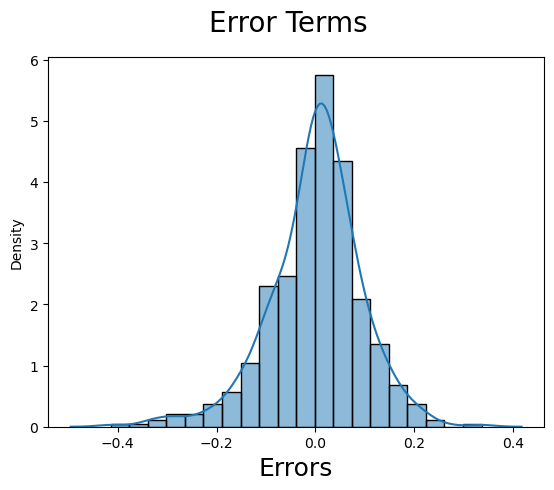

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_demand), bins = 20, kde=True, stat="density", kde_kws=dict(cut=3))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### looking for a pattern in the residuals

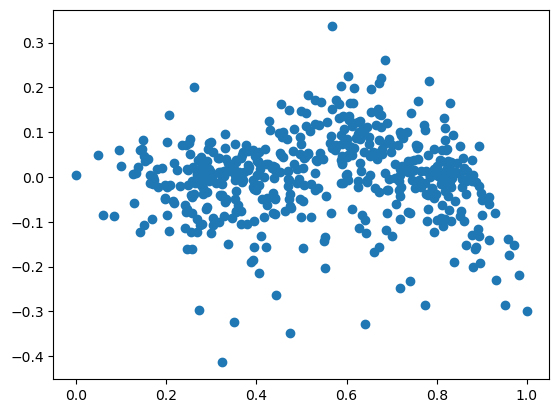

In [103]:
plt.scatter(X_train['temp'], (y_train - y_train_demand))
plt.show()

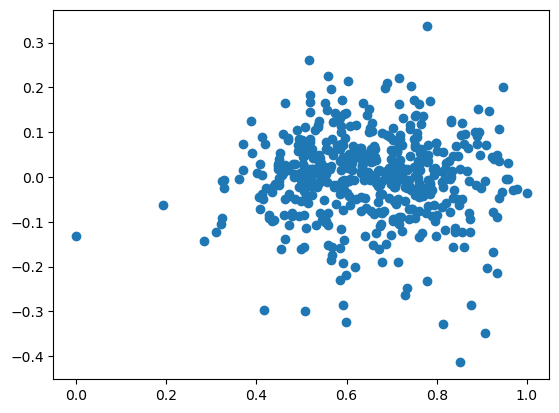

In [104]:
plt.scatter(X_train['hum'], (y_train - y_train_demand))
plt.show()

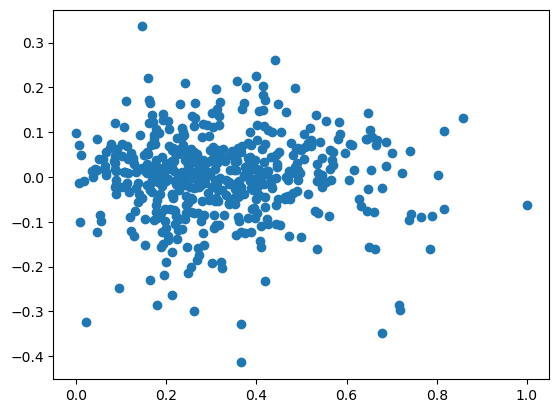

In [105]:
plt.scatter(X_train['windspeed'], (y_train - y_train_demand))
plt.show()

### Obseravation
- Normality assumption: Error terms were found normally distributed confirming the assumption.
- Zero mean assumption: Mean value of the residuals was found to be zero confirming the assumption.
- Constant variance assumption: Scatter plot was drawn between residuals (temp, windspeed and hum) and fitted values to confirm the Homoscedatsticity. Plot was random in nature and distributed horizontally confirming the assumption.
- Independent error assumption: Residual terms are independent of each other looking at the pair plot.

## Step 8: Predictions

In [108]:
# Apply scaler() to all the columns except the yr, holiday, workinday and dummy variables
num_vars = ['weekday', 'temp', 'atemp', 'hum','windspeed', 'cnt']

In [109]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

Dividing into X_test and y_test

In [111]:
y_test = df_test.pop('cnt')
X_test = df_test

In [112]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [113]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [114]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9: Model evaluation

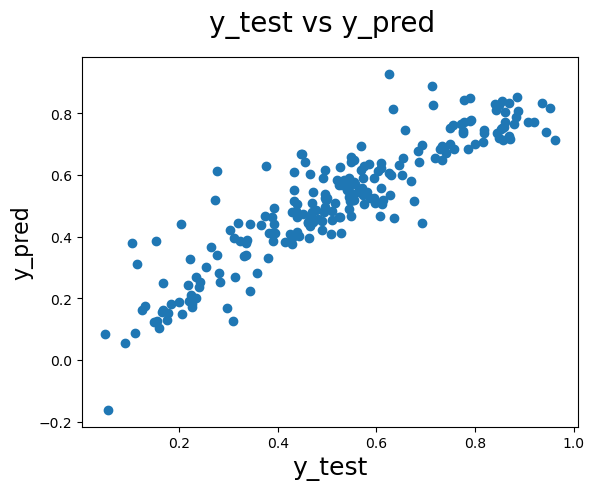

In [116]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Calculating R2 score on the test set

In [118]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8130073757429364

## Final assessment
R2 scores of the train and test data set are close enough and both are above 0.80.

We have a fairly strong fit model here.

The model can be furhter improved by adding any other or derived variable.

Equation is given as:
 cnt = 0.371 + (0.228 * yr) +  ((-0.086) * holiday) + (0.5314 * temp) + ((-0.2642) * hum) + ((-0.1022) * spring) + (0.0638 * winter) + ((-0.1949) * light) + ((-0.0924) * Jul)